In [1]:
import numpy as np
from emukit.test_functions import forrester_function
from emukit.core.loop.user_function import UserFunctionWrapper
from emukit.core import ContinuousParameter, ParameterSpace

def denormalize(X, bounds):
    return X * (bounds[:, 1] - bounds[:, 0]) + bounds[:, 0]

def goldstein_price(x):  
    shift1= 0
    shift2= 0
    scale = 1
    
    x1 = x[:, 0] 
    x2 = x[:, 1] 
    bounds1 = np.array([[-2, 2]])
    bounds2 = np.array([[-2, 2]])
    
    x1 = denormalize(x1, bounds1)
    x2 = denormalize(x2, bounds2)
    
    x1 = x1 - 4 * shift1
    x2 = x2 - 4 * shift2

    term1 = 1 + ((x1 + x2 + 1) ** 2) * (19 - 14 * x1 + 3 * x1 ** 2 - 14 * x2 + 6 * x1 * x2 + 3 * x2 ** 2)
    term2 = 30 + ((2 * x1 - 3 * x2) ** 2) * (18 - 32 * x1 + 12 * x1 ** 2 + 48 * x2 - 36 * x1 * x2 + 27 * x2 ** 2)
    f = np.log(term1 * term2)  # 加了log
#     f = term1 * term2
    f =   f * scale
    return f.reshape(-1, 1)

space = ParameterSpace([ContinuousParameter('x', 0, 1),
                        ContinuousParameter('y', 0, 1)])

In [2]:

x1_plot = np.linspace(space.parameters[0].min, space.parameters[0].max, 50)[:, None]
x2_plot = np.linspace(space.parameters[1].min, space.parameters[1].max, 500)[:, None]

x1_plot, x2_plot = np.meshgrid(x1_plot, x2_plot)

X_all = np.c_[x1_plot.ravel(), x2_plot.ravel()]
Y_all = goldstein_price(X_all)

y_min = np.min(Y_all)
y_max = np.max(Y_all)
print(y_min,y_max)

1.2174936859500498 13.830830618864008


In [3]:
# 找到与 y_min 对应的 X_all
min_index = np.argmin(Y_all)
X_min = X_all[min_index]
print("X_min:", X_min)



X_min: [0.51020408 0.25250501]


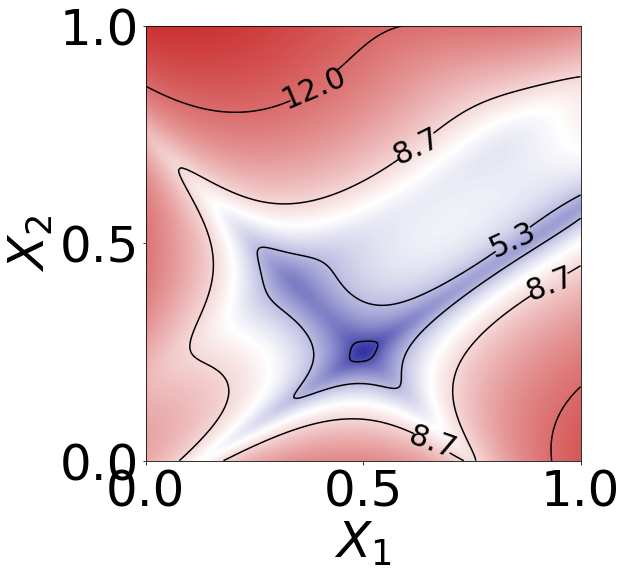

In [7]:
import matplotlib.pyplot as plt
#数据可视化
from matplotlib.colors import LinearSegmentedColormap

x = np.linspace(space.parameters[0].min, space.parameters[0].max, 200)[:, None]
y = np.linspace(space.parameters[0].min, space.parameters[0].max, 200)[:, None]
x_plot, y_plot = np.meshgrid(x, y)

Z = goldstein_price(np.c_[x_plot.ravel(), y_plot.ravel()]).reshape(x_plot.shape)




plt.figure(figsize=(12, 8))

# plt.plot(x_points, y_points, "ro", markersize=6, label="Observations")

# LEGEND_SIZE = 15
# # plt.legend(loc=2, prop={'size': LEGEND_SIZE})

# colors = [(0.2, 0.2, 0.65), (1, 1, 1), (0.8, 0.2, 0.2)]  # 从深紫色到白色再到红褐色
# cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)

# plt.imshow(Z, extent=[0, 1, 0, 1], origin='lower', cmap=cmap, alpha=0.7)
# #  RdGy_r  custom_cmap
# colorbar = plt.colorbar()
# colorbar.ax.tick_params(labelsize=LEGEND_SIZE)

# plt.rc('font', size=LEGEND_SIZE)  
# # contour_lines = plt.contour(x_plot, y_plot, Z, levels=np.linspace(-12, -2, 4), colors='black')
# contour_lines = plt.contour(x_plot, y_plot, Z, levels=np.linspace(2, 12, 4), colors='black')
# # contour_lines = plt.contour(x_plot, y_plot, Z, levels=[0.5, 1.3, 2.7, 4.5], colors='black')
# # contour_lines = plt.contour(x_plot, y_plot, Z, levels=[-2, 3, 5, 10], colors='black')


# plt.clabel(contour_lines, fontsize=LEGEND_SIZE, colors='black', inline=True, fmt='%.1f')
# # plt.title('Goldstein-Price Function')

# plt.xticks(fontsize=LEGEND_SIZE)  # 调整 X 轴刻度标签的字体大小
# plt.yticks(fontsize=LEGEND_SIZE)  # 调整 Y 轴刻度标签的字体大小



# plt.show()

fontsize=30
# plt.legend(loc=2, prop={'size': fontsize})

colors = [(0.2, 0.2, 0.65), (1, 1, 1), (0.8, 0.2, 0.2)]  # 从深紫色到白色再到红褐色
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)

# plt.imshow(Z, extent=[0, 1, 0, 1], origin='lower', cmap='RdGy_r')
plt.imshow(Z, extent=[0, 1, 0, 1], origin='lower', cmap=cmap, alpha=1)

# colorbar = plt.colorbar()
# colorbar.ax.tick_params(labelsize=fontsize)
# plt.rc('font', size=fontsize) 
contour_lines = plt.contour(x_plot, y_plot, Z, levels=np.linspace(2, 12, 4), colors='black', alpha=1)
plt.clabel(contour_lines, fontsize=fontsize, colors='black', inline=True, fmt='%.1f')




# 修改 x 轴和 y 轴的标签
plt.xlabel('$X_1$', fontsize=50)
plt.ylabel('$X_2$', fontsize=50)

# # 设置 x 轴的刻度标签字体大小为 12
plt.xticks([0, 0.5, 1], fontsize=50)

# 设置 y 轴的刻度标签字体大小为 12
plt.yticks([0, 0.5, 1], fontsize=50)

# plt.gca().axes.get_xaxis().set_visible(False)

plt.show()


In [5]:
Z.shape

(200, 200)

In [18]:
# data = np.hstack((X_all, Y_all))

# # 随机打乱数据
# np.random.shuffle(data)

# # 重新分离 x_plot 和 y_plot
# x_plot_shuffled = data[:, 0]
# y_plot_shuffled = data[:, 1]

import pandas as pd

# 将 x_plot_shuffled 和 y_plot_shuffled 创建为 pandas 数据帧
df = pd.DataFrame({'x1': X_all[:, 0], 'x2': X_all[:, 1],'y': Y_all[:, 0]})

# 指定要保存的 Excel 文件名
excel_file = 'goldstein_data.xlsx'

# 将数据保存为 Excel 文件
df.to_excel(excel_file, index=False)
